In [ ]:
import os
import pickle
import pandas as pd

from datasets import load_dataset, load_from_disk
from sklearn.model_selection import train_test_split

In [ ]:
# Download dataset or load from disk

dataset_path = '../../Resources/Datasets/CIFAR10'

# check if the dataset is already downloaded
if not os.path.exists(dataset_path):
    dataset = load_dataset(
                'cifar10'
            )
    os.makedirs(dataset_path, exist_ok=True)
    dataset.save_to_disk(dataset_path)
else:
    dataset = load_from_disk(dataset_path)
    
train_dataset = dataset['train']
test_dataset = dataset['test']

In [ ]:
df_train = pd.DataFrame()
df_train['label'] = train_dataset['label']
df_train.head()

df_test = pd.DataFrame()
df_test['label'] = test_dataset['label']
df_test.head()

,label
0,0
1,6
2,0
3,2
4,7


In [ ]:
# Select the classes [1: automobile, 7: horse] from CIFAR10

df_train = df_train[(df_train['label']==1) | (df_train['label']==7)]
df_train['label'].value_counts()

df_test = df_test[(df_test['label']==1) | (df_test['label']==7)]
df_test['label'].value_counts()

label
1    1000
7    1000
Name: count, dtype: int64

In [ ]:
# Select `training_size` samples to form a training set

training_size = 5000

if training_size<len(df_train):
    df_train_, _ = train_test_split(df_train, train_size=training_size, random_state=42, stratify=df_train['label'])
else:
    df_train_ = df_train.copy()
print(len(df_train_))

# Save the indices of the training set

filename = os.path.join('./data/indices/idx-train.pkl')
os.makedirs(os.path.dirname(filename), exist_ok=True)

with open(filename, 'wb') as handle:
    pickle.dump(df_train_.index.to_list(), handle)

In [ ]:
# Select 1000 samples from test set to form a validation set

df_val, _ = train_test_split(df_test, train_size=1000, random_state=42, stratify=df_test['label'])
df_val['label'].value_counts()

# Save the indices of the validation set

filename = os.path.join('./data/indices/idx-val.pkl')
os.makedirs(os.path.dirname(filename), exist_ok=True)

with open(filename, 'wb') as handle:
    pickle.dump(df_test.index.to_list(), handle)

label
7    500
1    500
Name: count, dtype: int64

In [ ]:
# Generate the indices of the sub-training sets for retraining

sub_training_size = 0.5

count = 0

for index in range(256):
    tmp, _ = train_test_split(df_train_, train_size=sub_training_size, random_state=42+count+index, stratify=df_train_['label'])
    
    # Save the indices of the sub-training set
    filename = os.path.join('./data/indices/lds-val/sub-idx-{}.pkl'.format(index))
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as handle:
        pickle.dump(tmp.index.to_list(), handle)
        
    count = count+1
    
print(count)

for index in range(256):
    tmp, _ = train_test_split(df_train_, train_size=sub_training_size, random_state=42+count+index, stratify=df_train_['label'])
    
    # Save the indices of the sub-training set
    filename = os.path.join('./data/indices/lds-test/sub-idx-{}.pkl'.format(index))
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as handle:
        pickle.dump(tmp.index.to_list(), handle)
        
    count = count+1 
    
print(count)

for k in range(1024):
    tmp, _ = train_test_split(df_train_, train_size=sub_training_size, random_state=42+count+index, stratify=df_train_['label'])

    # Save the indices of the sub-training set
    filename = os.path.join('./data/indices/retrain/sub-idx-{}.pkl'.format(index))
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as handle: 
        pickle.dump(tmp.index.to_list(), handle)
        
    count = count+1   
    
print(count)

5000
256
512
1536


In [ ]:
# Validate the indices

with open('./data/indices/idx-train.pkl', 'rb')  as handle:
    idx_train = pickle.load(handle)
print(len(idx_train))   

with open('./data/indices/idx-val.pkl', 'rb')  as handle:
    idx_val = pickle.load(handle)
print(len(idx_val))

print(idx_train[0:5])  
print(idx_val[0:5])

5000

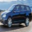

In [ ]:
train_dataset = dataset['train'].select(idx_train)
print(train_dataset)

train_dataset[0]["img"]

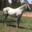

In [ ]:
val_dataset =  dataset['test'].select(idx_val)
print(val_dataset)

val_dataset[0]["img"]

In [ ]:
# Validate the subset indices
with open("./data/indices/lds-val/sub-idx-0.pkl", 'rb') as handle:
    sub_idx = pickle.load(handle)
    
print(len(sub_idx))

print(sub_idx[0:5])

[10392, 44460, 16163, 49891, 13381]


In [ ]:
with open("./data/indices/lds-val/sub-idx-8.pkl", 'rb') as handle:
    sub_idx = pickle.load(handle)

print(sub_idx[0:5])

[4871, 21837, 20107, 553, 20868]
